# EDA

Importing libraries

In [1]:
!pip install numpy pandas matplotlib scikit-learn nilearn nibabel


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting, surface


/Users/precioux/Documents/Self-work/courses/pythonProject1/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [7]:
import nibabel as nib

the surface geometry files of the brain hemispheres

In [4]:
lh_surf_path = "/Applications/freesurfer/8.0.0/subjects/fsaverage/surf/lh.inflated"
rh_surf_path = "/Applications/freesurfer/8.0.0/subjects/fsaverage/surf/rh.inflated"

Loading Data

In [5]:
lh_data_path = "/Users/precioux/Desktop/NeuroAI/NSD/nsddata_betas/ppdata/subj01/fsaverage/betas_fithrf/lh.betas_session01.mgh"
rh_data_path = "/Users/precioux/Desktop/NeuroAI/NSD/nsddata_betas/ppdata/subj01/fsaverage/betas_fithrf/rh.betas_session01.mgh"

In [8]:
lh_mgh = nib.load(lh_data_path)
rh_mgh = nib.load(rh_data_path)

Shape and Data points

In [9]:
# Extract the data as a NumPy array
lh_data = lh_mgh.get_fdata()  # shape: (vertices, 1, 1, timepoints)
rh_data = rh_mgh.get_fdata()

In [10]:
lh_data

memmap([[[[-1.97403276, -1.34567034, -2.28788161, ...,  0.59221214,
           -0.04986858, -0.98740673]]],


        [[[ 0.98314589,  0.13509397, -0.5173018 , ...,  1.25214732,
            0.19285409,  1.85063076]]],


        [[[ 1.43334615,  2.08414578, -0.53183633, ...,  0.31341347,
            0.31137958, -0.37470451]]],


        ...,


        [[[ 2.58477116,  3.16585636,  6.62451124, ...,  7.51008415,
            4.36166716, -7.11411142]]],


        [[[ 1.67221868, -4.74823427, -0.5909903 , ..., -0.28519228,
           -2.99089122,  3.63221431]]],


        [[[-0.14994924, -4.46863556,  0.01248129, ..., -2.21715856,
           -6.63886309,  6.1540513 ]]]])

In [11]:
lh_data = np.squeeze(lh_data)  # shape: (n_vertices_lh, n_timepoints)
rh_data = np.squeeze(rh_data)  # shape: (n_vertices_rh, n_timepoints)

print("Left hemisphere shape:", lh_data.shape)
print("Right hemisphere shape:", rh_data.shape)


Left hemisphere shape: (163842, 750)
Right hemisphere shape: (163842, 750)


Visualization

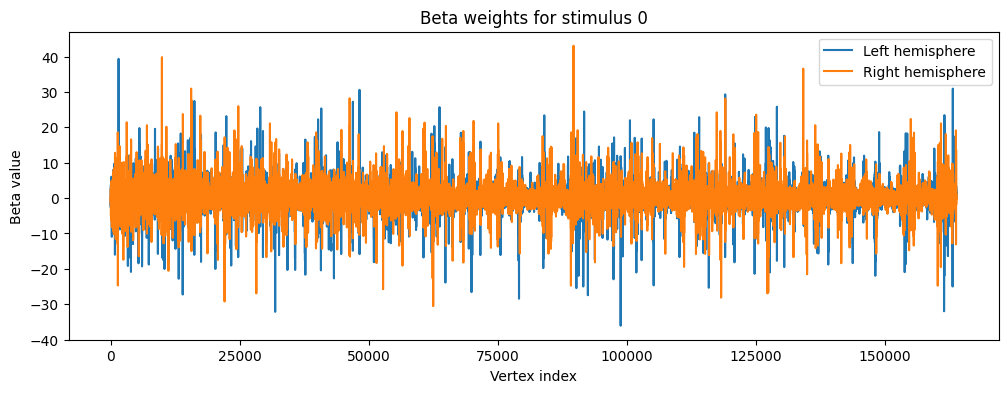

In [12]:
import matplotlib.pyplot as plt

stim_idx = 0  # change to view different stimuli

plt.figure(figsize=(12, 4))
plt.plot(lh_data[:, stim_idx], label='Left hemisphere')
plt.plot(rh_data[:, stim_idx], label='Right hemisphere')
plt.title(f'Beta weights for stimulus {stim_idx}')
plt.xlabel('Vertex index')
plt.ylabel('Beta value')
plt.legend()
plt.show()


Visualization Plus

In [13]:
lh = nib.load("/Users/precioux/Desktop/NeuroAI/NSD/nsddata_betas/ppdata/subj01/fsaverage/betas_fithrf/lh.betas_session01.mgh").get_fdata()
rh = nib.load("/Users/precioux/Desktop/NeuroAI/NSD/nsddata_betas/ppdata/subj01/fsaverage/betas_fithrf/rh.betas_session01.mgh").get_fdata()

# Squeeze to get (vertices, timepoints)
lh = np.squeeze(lh)
rh = np.squeeze(rh)


In [14]:
# Choose a stimulus
stim_idx = 0
lh_beta = lh[:, stim_idx]
rh_beta = rh[:, stim_idx]

In [23]:
print("RH beta min:", rh_beta.min())
print("RH beta max:", rh_beta.max())


RH beta min: -30.542665481567383
RH beta max: 43.077457427978516


In [24]:
print("RH beta shape:", rh_beta.shape)


RH beta shape: (163842,)


In [34]:
inflated_rh = "/Applications/freesurfer/8.0.0/subjects/fsaverage/surf/rh.inflated"
sulc_rh     = "/Applications/freesurfer/8.0.0/subjects/fsaverage/surf/rh.sulc"

inflated_lh = "/Applications/freesurfer/8.0.0/subjects/fsaverage/surf/lh.inflated"
sulc_lh     = "/Applications/freesurfer/8.0.0/subjects/fsaverage/surf/lh.sulc"


/var/folders/_m/qyd_78r54hlc3qlgxy6q01qm0000gn/T/ipykernel_3116/3987473193.py:3: DeprecationWarning: The `darkness` parameter will be deprecated in release 0.13. We recommend setting `darkness` to None
  plotting.plot_surf_stat_map(


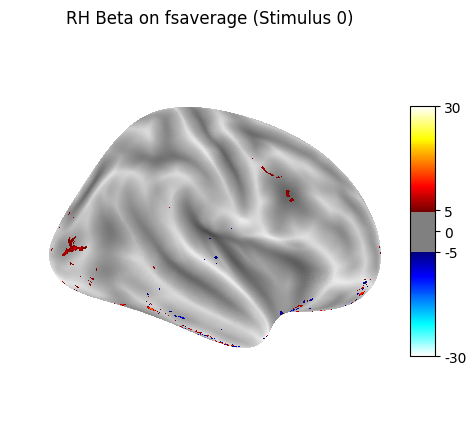

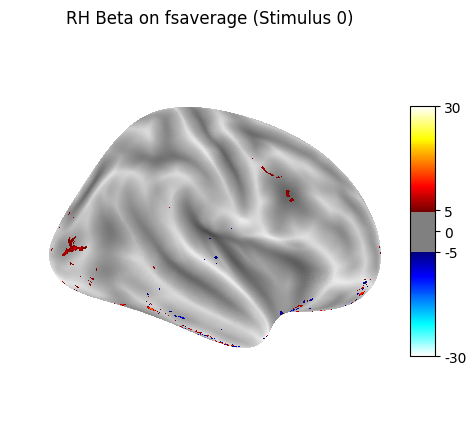

In [35]:
from nilearn import plotting

plotting.plot_surf_stat_map(
    inflated_rh,
    rh_beta,
    hemi='right',
    bg_map=sulc_rh,
    title='RH Beta on fsaverage (Stimulus 0)',
    threshold=5,
    vmax=30,
    cmap='cold_hot',
    colorbar=True
)


/var/folders/_m/qyd_78r54hlc3qlgxy6q01qm0000gn/T/ipykernel_3116/1274505821.py:3: DeprecationWarning: The `darkness` parameter will be deprecated in release 0.13. We recommend setting `darkness` to None
  plotting.plot_surf_stat_map(


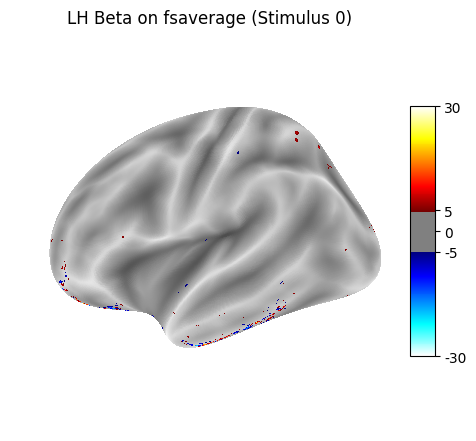

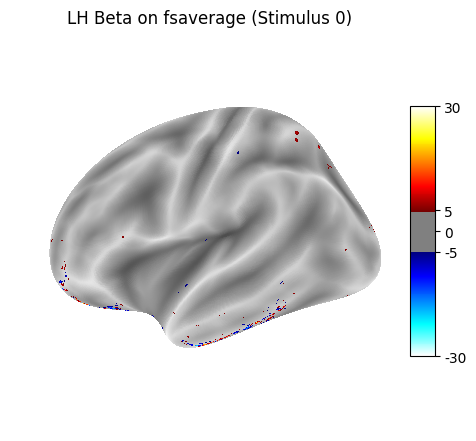

In [36]:
from nilearn import plotting

plotting.plot_surf_stat_map(
    inflated_lh,
    lh_beta,
    hemi='left',
    bg_map=sulc_lh,
    title='LH Beta on fsaverage (Stimulus 0)',
    threshold=5,
    vmax=30,
    cmap='cold_hot',
    colorbar=True
)
